In [150]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [151]:
BLACK = (0, 0, 0)
SAND = (194, 178, 128)
RED = (255, 0, 0)
WATER = (0, 0, 255)
ROCK = (128, 128, 128)
WHITE = (255, 255, 255)

n = 2 # Rows of the matrix
m = 3 # Columns of the matrix

In [152]:
def move(matrix):
    matrix_out = np.copy(matrix)
    n, m = matrix.shape
    for i in range(n-1, -1, -1):
            for j in range(m):
                if matrix_out[i, j] == 1: # Sand
                    if i < n-1: # The cell is not at the bottom border
                        if matrix_out[i+1, j] == 0: # Bottom free
                            matrix_out[i, j] = 0
                            matrix_out[i+1, j] = 1

                        elif j > 0 and matrix_out[i+1, j-1] == 0: # Botton left free
                            matrix_out[i, j] = 0
                            matrix_out[i+1, j-1] = 1

                        elif j < m-1 and matrix_out[i+1, j+1] == 0: # Bottom right free
                            matrix_out[i, j] = 0
                            matrix_out[i+1, j+1] = 1

                        # Interaction with water
                        elif matrix_out[i+1, j] == 2: # Bottom free
                            matrix_out[i, j] = 2
                            matrix_out[i+1, j] = 1


                if matrix_out[i, j] == 2: # Water
                    if i < n-1: # The cell is not at the bottom border
                        if matrix_out[i+1, j] == 0: # Bottom free 
                            matrix_out[i, j] = 0
                            matrix_out[i+1, j] = 2

                        elif j > 0 and matrix_out[i+1, j-1] == 0: # Bottom left free
                            matrix_out[i, j] = 0
                            matrix_out[i+1, j-1] = 2

                        elif j < m-1 and matrix_out[i+1, j+1] == 0: # Botton right free
                            matrix_out[i, j] = 0
                            matrix_out[i+1, j+1] = 2

                        elif j > 0 and j < m-1 and matrix_out[i, j-1] == 0 and matrix_out[i, j+1] == 0: # Bottom occupied and both sides free
                            matrix_out[i, j] = 0
                            rand = np.random.choice([1, -1])
                            matrix_out[i, j+rand] = 2

                        elif j > 0 and j < m-1 and matrix_out[i, j+1] == 0: # Bottom occupied and right free
                            matrix_out[i, j] = 0
                            matrix_out[i, j+1] = 2

                        elif j > 0 and j < m-1 and matrix_out[i, j-1] == 0: # Bottom occupied and left free
                            matrix_out[i, j] = 0
                            matrix_out[i, j-1] = 2
    return matrix_out

In [153]:
def plot_matrix(matrix):
    # Define los colores en formato RGB
    sand_color = (194/255, 178/255, 128/255)  # Color arena
    water_color = (0, 0, 255/255)  # Color agua (azul)
    rock_color = (128/255, 128/255, 128/255) # Color roca


    # Define los límites de los valores en la escala de color
    bounds = [0, 1, 2, 3, 4]

    # Crea un mapa de colores personalizado
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_colors', [(0, 0, 0), sand_color, water_color, rock_color], N=4)

    # Normaliza los valores
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Grafica la matriz
    fig = plt.matshow(matrix, cmap=cmap, norm=norm, interpolation='nearest')
    plt.axis('off')  # Elimina los ticks de los ejes
    plt.close()

    return fig

In [154]:
def highlight_cell(x,y, ax=None, **kwargs): # https://stackoverflow.com/questions/56654952/how-to-draw-cell-borders-in-imshow
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

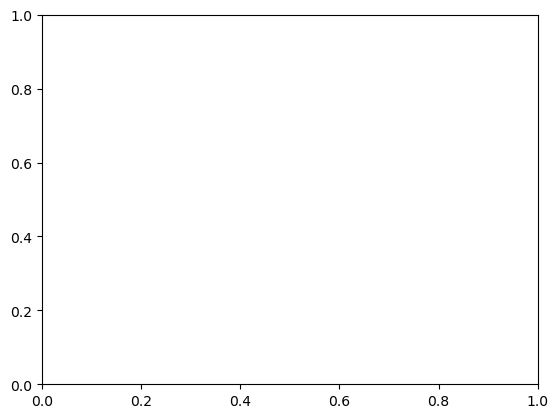

In [155]:
matrix = np.array(
    [
    [0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 2., 0., 0., 0., 2., 0., 0.],
    [0., 0., 2., 0., 0., 0., 2., 0., 0.],
    [0., 0., 0., 0., 3., 0., 0., 0., 0.],
    [0., 0., 0., 0., 3., 0., 0., 0., 0.],
    [0., 1., 0., 0., 0., 0., 0., 1., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0.]
    ]
    )
plot_matrix(matrix)
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[0]):
        highlight_cell(i,j, color="white", linewidth=1)
plt.savefig("Graphics/grid.pdf", bbox_inches = 'tight')

In [156]:
def plot_side_by_side(fig1, fig2,title1='', title2=''):
    # Crea una nueva figura con subfiguras
    fig, axs = plt.subplots(1, 2)

    # Ajusta el espaciado entre las subfiguras
    plt.subplots_adjust(wspace=1)

    # Añade las imágenes existentes a las subfiguras
    axs[0].axis('off')  # Desactiva los ejes para evitar superposiciones
    axs[1].axis('off')  # Desactiva los ejes para evitar superposiciones

    # Añade la imagen de la primera gráfica a la primera subfigura
    axs[0].imshow(fig1.get_array(), cmap=fig1.get_cmap(), norm=fig1.norm)
    axs[0].set_title(title1)

    # Añade la imagen de la segunda gráfica a la segunda subfigura
    axs[1].imshow(fig2.get_array(), cmap=fig2.get_cmap(), norm=fig2.norm)
    axs[1].set_title(title2)

    

    return fig

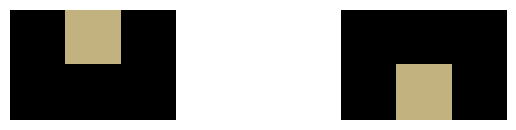

In [157]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)

plt.savefig('Graphics/sand1.pdf', bbox_inches = 'tight')



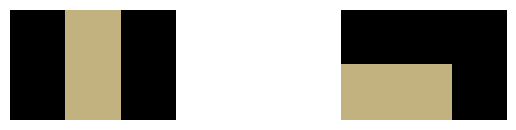

In [158]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
entrada[1, 1] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand2.pdf', bbox_inches = 'tight')

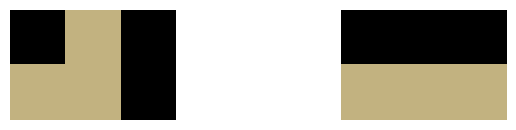

In [159]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
entrada[1, 1] = 1
entrada[1, 0] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand3.pdf', bbox_inches = 'tight')

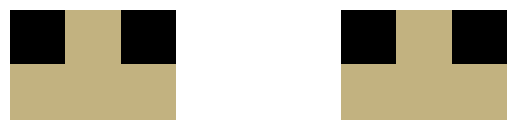

In [160]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
entrada[1, 1] = 1
entrada[1, 0] = 1
entrada[1, 2] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand4.pdf', bbox_inches = 'tight')

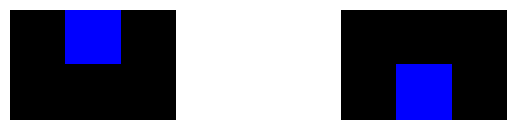

In [161]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 2
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/water1.pdf', bbox_inches = 'tight')



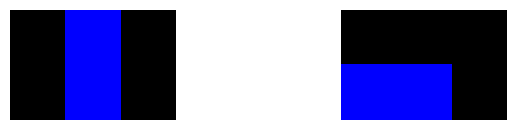

In [162]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 2
entrada[1, 1] = 2
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/water2.pdf', bbox_inches = 'tight')

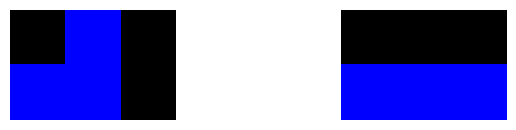

In [163]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 2
entrada[1, 1] = 2
entrada[1, 0] = 2
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/water3.pdf', bbox_inches = 'tight')

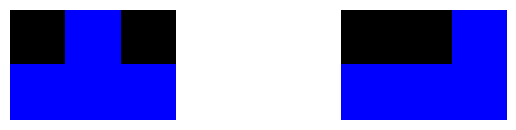

In [164]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 2
entrada[1, 1] = 2
entrada[1, 0] = 2
entrada[1, 2] = 2
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/water4.pdf', bbox_inches = 'tight')

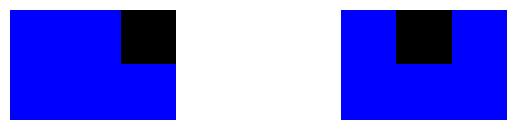

In [165]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 2
entrada[1, 1] = 2
entrada[1, 0] = 2
entrada[1, 2] = 2
entrada[0, 0] = 2
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/water5.pdf', bbox_inches = 'tight')

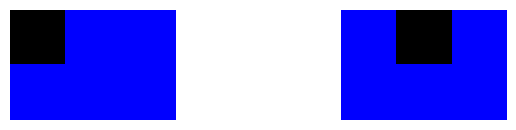

In [178]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 2
entrada[1, 1] = 2
entrada[1, 0] = 2
entrada[1, 2] = 2
entrada[0, 2] = 2
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/water6.pdf', bbox_inches = 'tight')

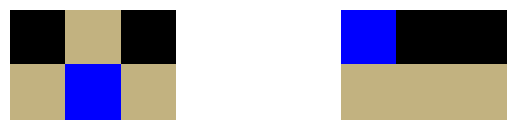

In [167]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
entrada[1, 1] = 2
entrada[1, 0] = 1
entrada[1, 2] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/water7.pdf', bbox_inches = 'tight')

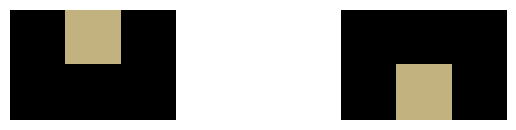

In [168]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand1.pdf', bbox_inches = 'tight')



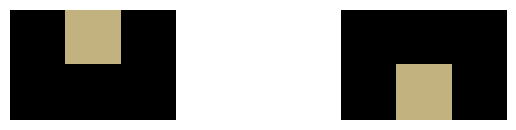

In [169]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand1.pdf', bbox_inches = 'tight')



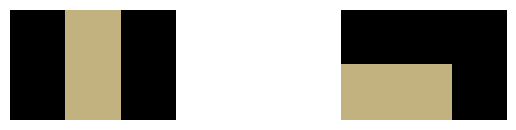

In [170]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
entrada[1, 1] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand2.pdf', bbox_inches = 'tight')

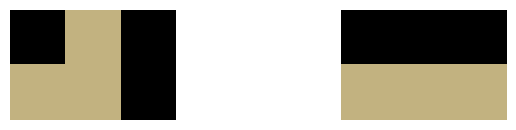

In [171]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
entrada[1, 1] = 1
entrada[1, 0] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand3.pdf', bbox_inches = 'tight')

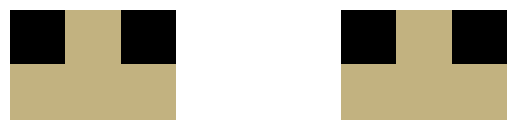

In [172]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
entrada[1, 1] = 1
entrada[1, 0] = 1
entrada[1, 2] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand4.pdf', bbox_inches = 'tight')

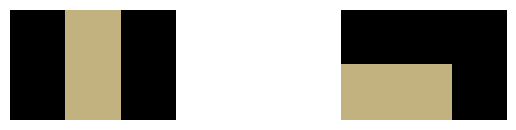

In [173]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
entrada[1, 1] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand2.pdf', bbox_inches = 'tight')

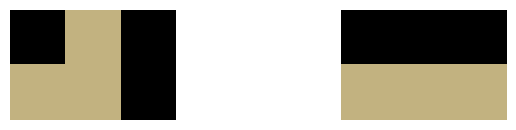

In [174]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
entrada[1, 1] = 1
entrada[1, 0] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand3.pdf', bbox_inches = 'tight')

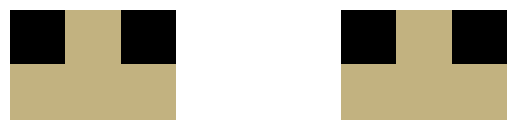

In [175]:
matrix = np.zeros((n, m))
entrada = matrix
entrada[0, 1] = 1
entrada[1, 1] = 1
entrada[1, 0] = 1
entrada[1, 2] = 1
salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/sand4.pdf', bbox_inches = 'tight')

In [176]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

matrix = np.flip(matrix, axis=1)
print("Matriz volteada horizontalmente:")
print(matrix)

# Voltear la matriz verticalmente
matrix = np.flip(matrix, axis=0)
print("\nMatriz volteada verticalmente:")
print(matrix)

Matriz volteada horizontalmente:
[[3 2 1]
 [6 5 4]
 [9 8 7]]

Matriz volteada verticalmente:
[[9 8 7]
 [6 5 4]
 [3 2 1]]


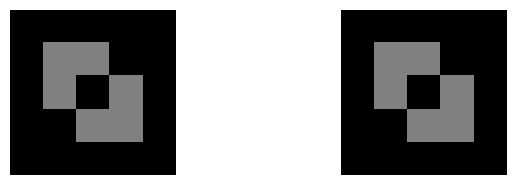

In [177]:
matrix = np.zeros((5, 5))
entrada = matrix
entrada[3, 3] = 3
entrada[3, 2] = 3
entrada[2, 3] = 3
entrada[1, 1] = 3
entrada[1, 2] = 3
entrada[2, 1] = 3

salida = move(entrada)
salida_plot = plot_matrix(salida)
entrada_plot = plot_matrix(entrada)
entrada_salida = plot_side_by_side(entrada_plot, salida_plot)
plt.savefig('Graphics/rock1.pdf', bbox_inches = 'tight')